# Segunda Parte

### Imports

In [73]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Actual PATH
import configparser
import warnings
import os
import subprocess

### Prepare Principal Directory

In [2]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [4]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores'

### Cell Format

In [23]:
config = configparser.ConfigParser()
config.read('src/visualization/matplotlib_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])
savefig_format = config['figure']['savefig_format']
savefig_dpi = int(config['figure']['savefig_dpi'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

In [63]:
plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout

plt.rcParams['savefig.format'] = savefig_format
plt.rcParams['savefig.dpi'] = savefig_dpi

# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

sns.set(font=font_family,
        context='notebook',
        style='darkgrid')

In [56]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load dataset

In [15]:
df = pd.read_csv('data/cleansing/dados_limpos_ceaps_cleansing.csv',
                 encoding='utf-8',
                 delimiter=',',
                 verbose=True,
                 parse_dates=['DATA'])

Tokenization took: 29.17 ms
Type conversion took: 38.06 ms
Parser memory cleanup took: 0.01 ms


In [17]:
# Primeiras linhas do dataset
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.6
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.0
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.0


### Seleção condicional onde pegamos todos as linhas cujo o valor reembolsado é R$ 0,01

In [18]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6773,2016,3,29,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6774,2016,3,29,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11160,2016,6,42,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11376,2016,12,42,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18560,2016,6,64,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23071,2016,3,83,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


In [20]:
# Selecionando todas as despesas do senador 29
senador29 = df[df['SENADOR'] == 29]
senador29.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6684,2016,1,29,Aluguel,409.134.304-04,ALDECI JOSÉ DE MEDEIROS CABO,01/16,2016-02-15,Referente pagamento de sala destinada ao escri...,1800.0
6685,2016,1,29,Aluguel,10.835.932/0001-08,COMPAINHA ENERGÉTICA DE PERNAMBUCO,406028,2016-05-01,Consumo de energia elétrica do escritório parl...,206.33
6686,2016,1,29,Aluguel,124.147.944-53,JOSÉ CARLOS FONTAINE COSTA,01/16,2016-01-15,Referente pagamento de sala destinada ao escri...,2160.0
6687,2016,1,29,Aluguel,04.206.050/0001-80,Tim Celular SA,000242962aa,2016-01-14,Referente Telefone celular no uso da atividade...,958.65
6688,2016,1,29,Contratações,37.067.543/0001-36,Fábrica de Ideias Tecnologia e Comunicações LTDA,1390,2016-02-02,Serviço de Clipping. 01/2016,1600.0


In [21]:
#O Senador 29 possui 601 despesas lançadas
senador29.shape

(599, 10)

### Criando um gráfico de barras para cada uma dos tipos de despesa

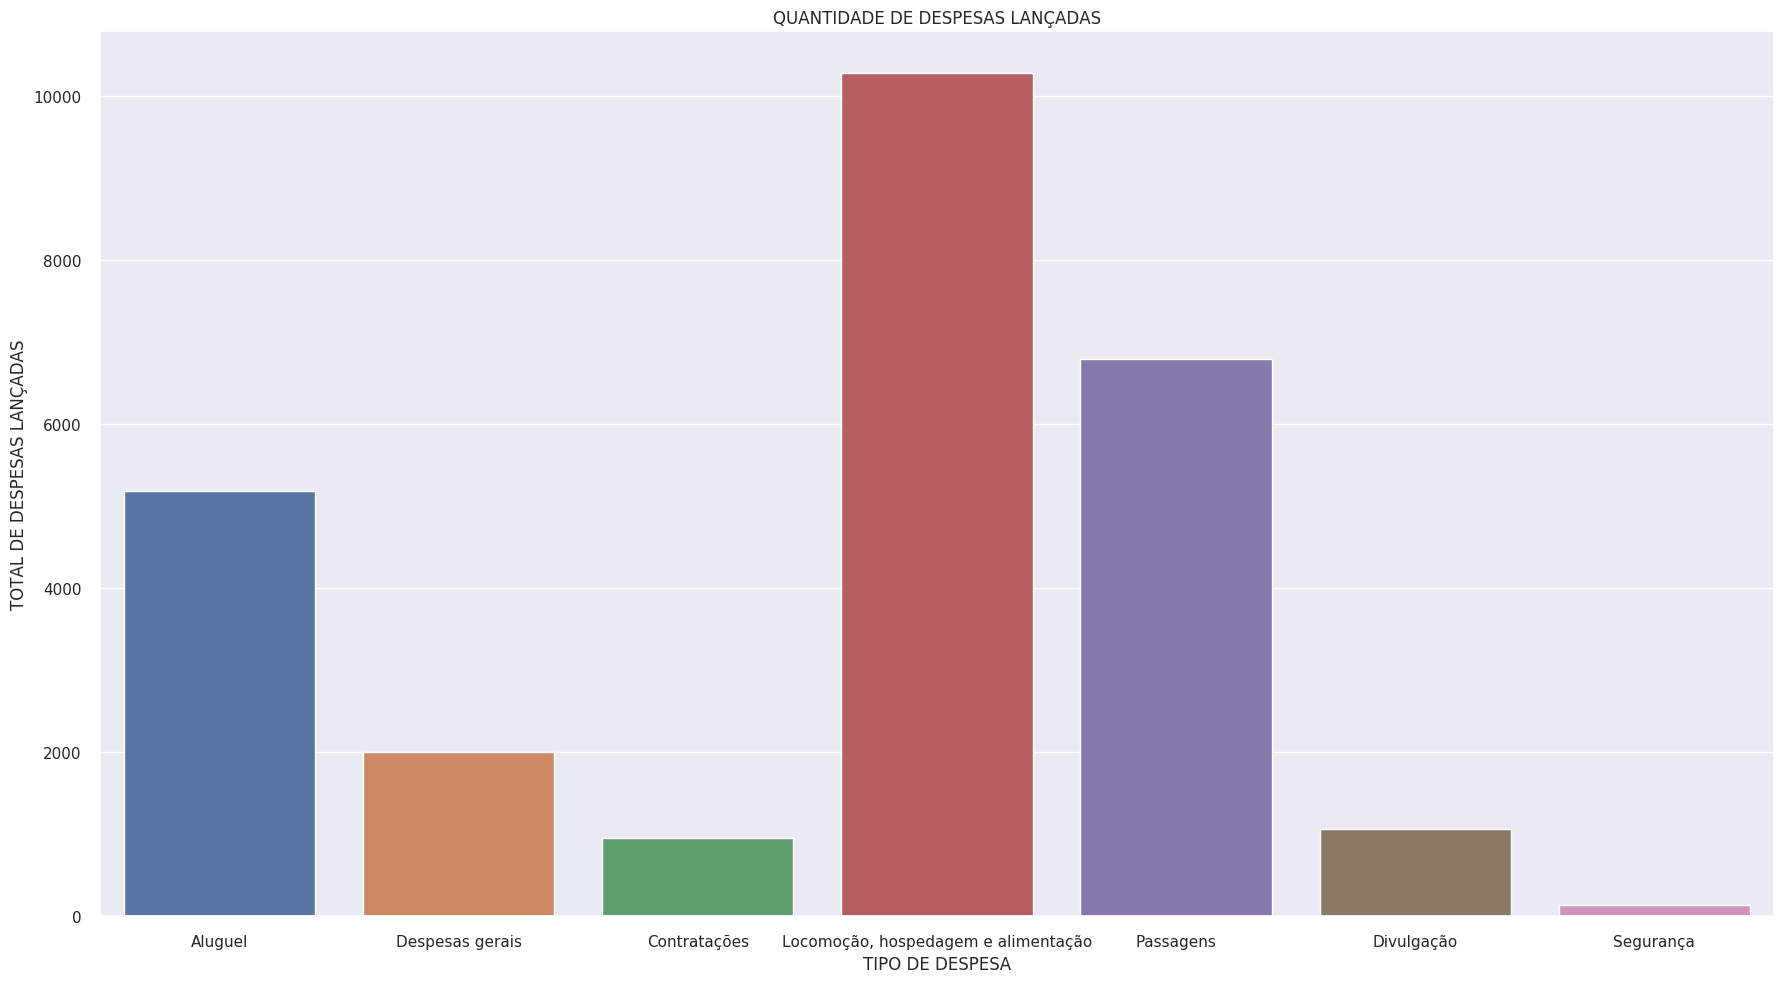

In [64]:
sns.countplot(data=df, x='TIPO_DESPESA',)


#Definindo título
plt.title('QUANTIDADE DE DESPESAS LANÇADAS')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('TOTAL DE DESPESAS LANÇADAS')
#Exibindo gráfico
plt.show()

### Verificando a quantidade de despesas lançadas por cada senador.

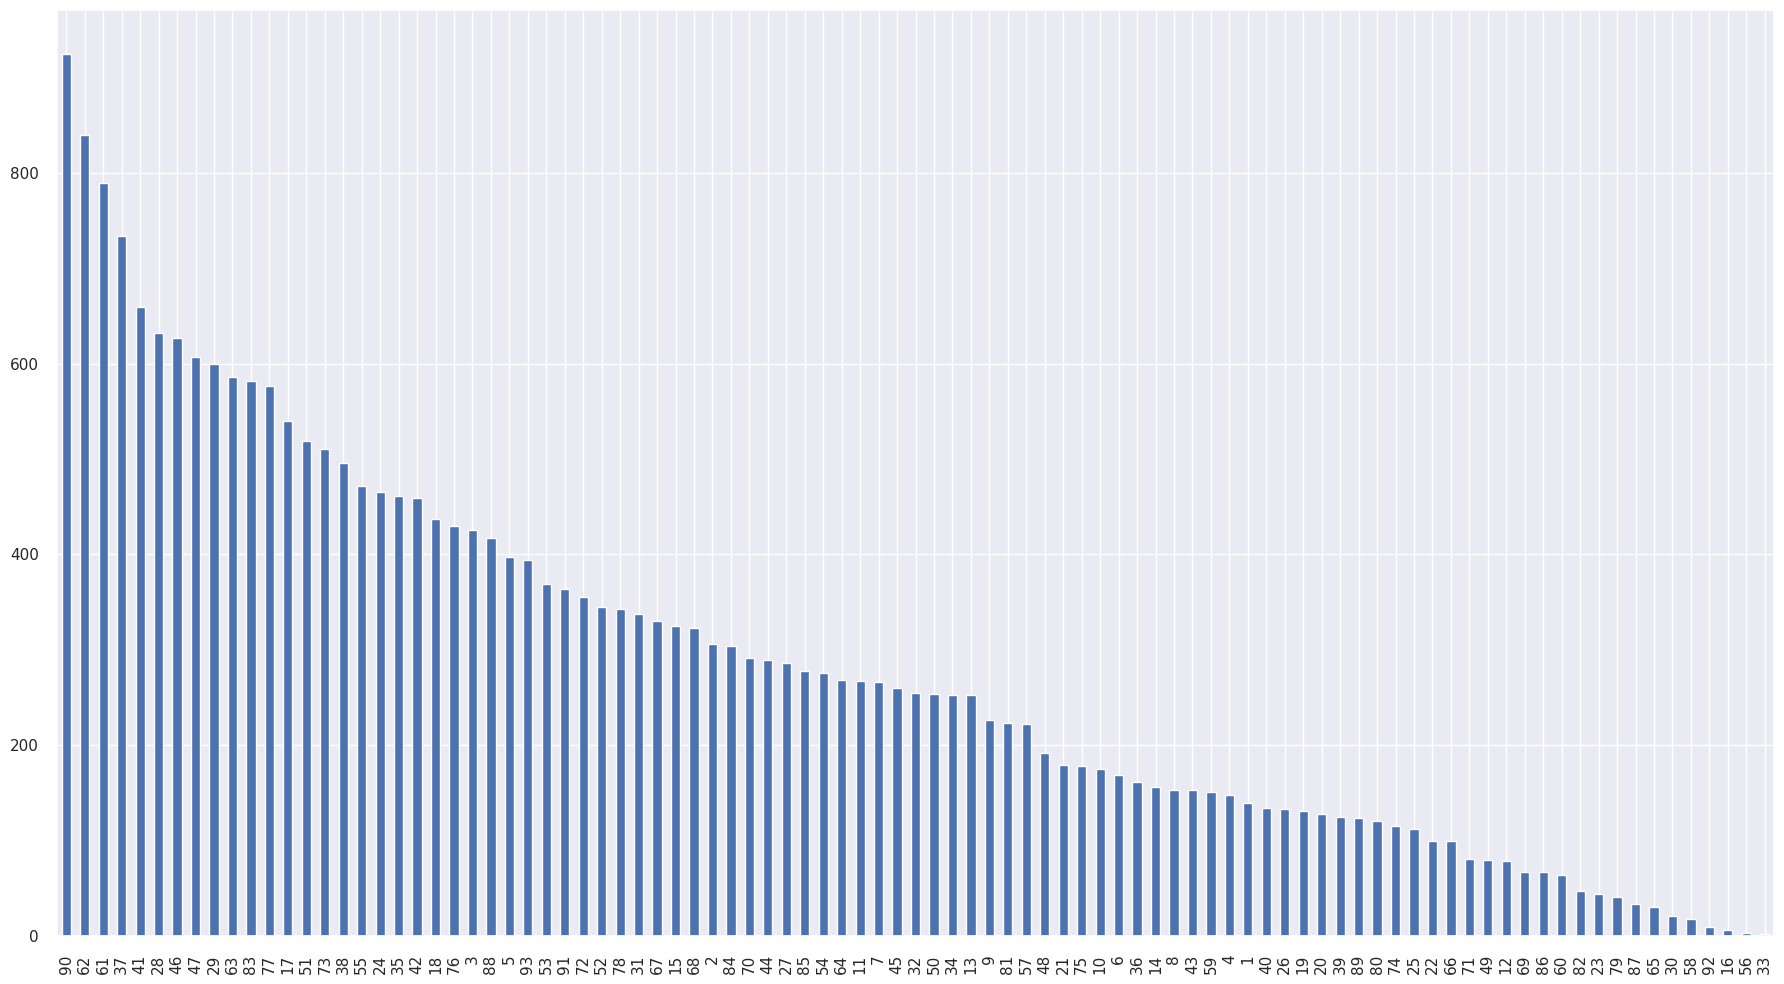

In [65]:
df['SENADOR'].value_counts().plot(kind='bar')
plt.show()

### Verificando os senadores que tiveram mais dinheiro reembolsado, do maior para o menor

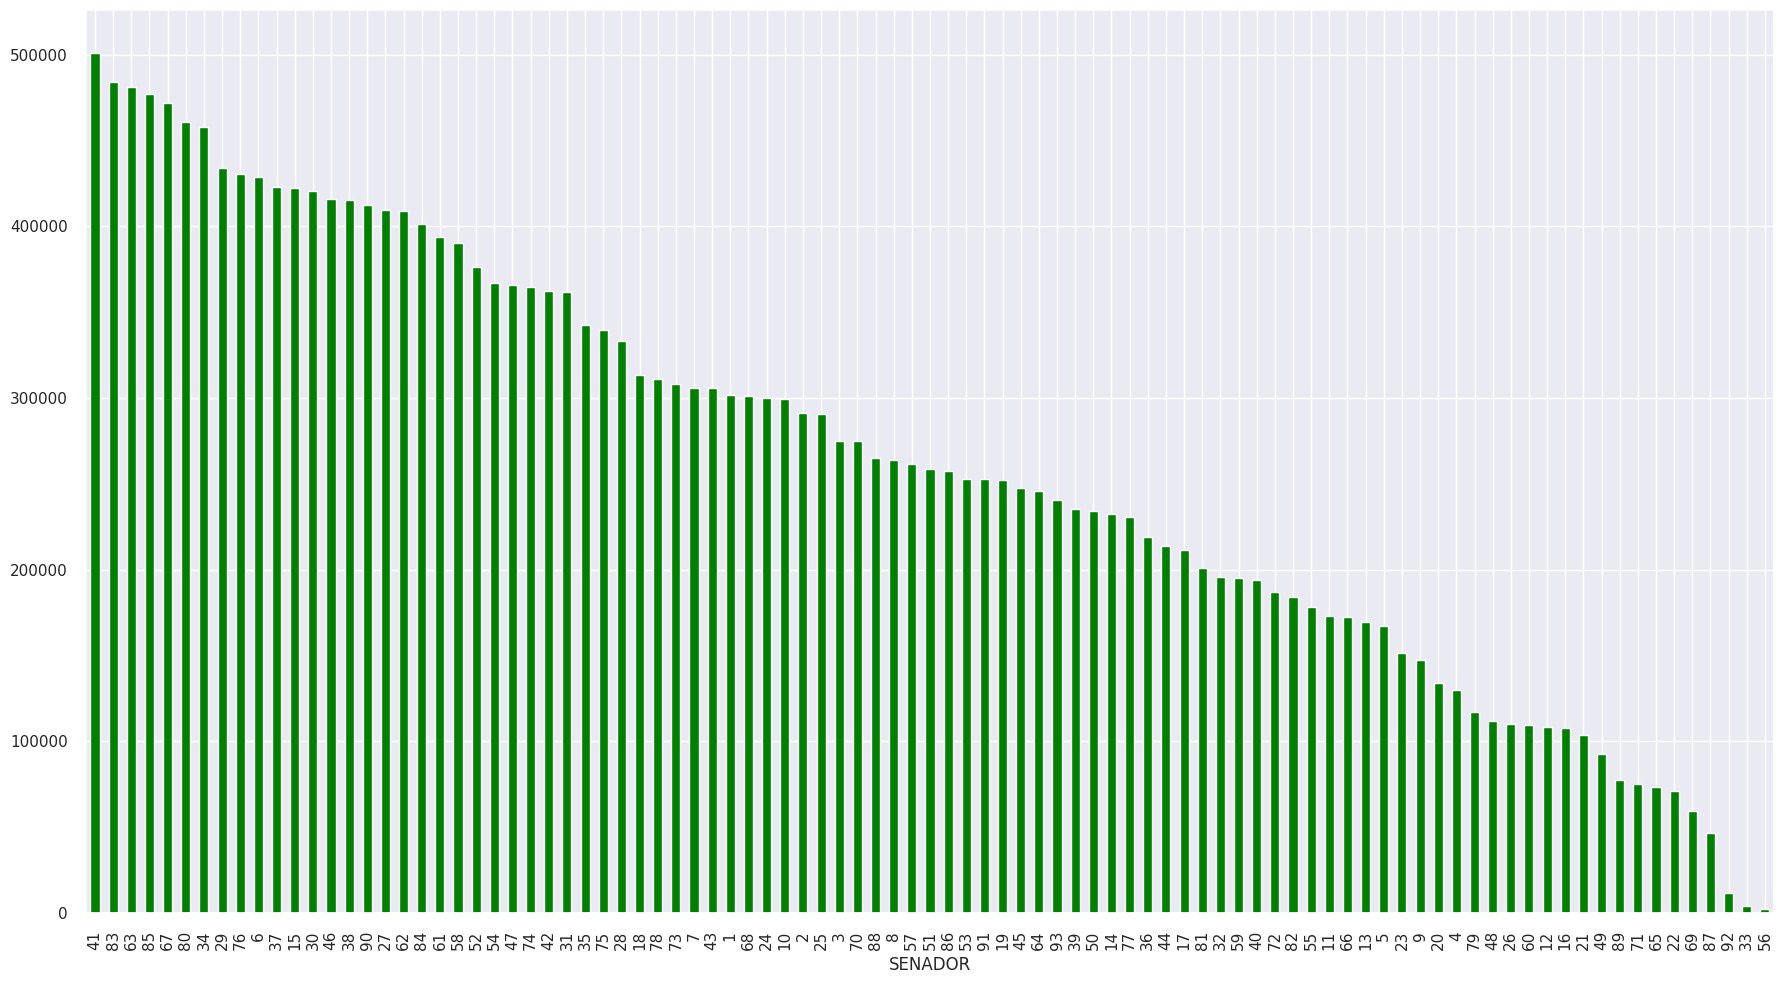

In [66]:
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')
plt.show()

In [67]:
#Transformando todos os valores da coluna Data para apenas retornar o ano e mês
df['DATA'] = df['DATA'].apply(lambda x: x.strftime('%Y-%m'))

### Verificando o quanto que foi pedido de reembolso durante cada mês

In [68]:
gastos_por_mes = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.sum)

# map to view month's name
gastos_por_mes = gastos_por_mes.rename(index={
                      '2016-01':"janeiro",
                      '2016-02':"fevereiro",
                      '2016-03':"março",
                      '2016-04':"abril",
                      '2016-05':"maio",
                      '2016-06':"junho",
                      '2016-07':"julho",
                      '2016-08':"agosto",
                      '2016-09':"setembro",
                      '2016-10':"outubro",
                      '2016-11':"novembro",
                      '2016-12':"dezembro"})
gastos_por_mes

,VALOR_REEMBOLSADO
DATA,
janeiro,3.3367e+06
fevereiro,2.10023e+06
março,2.06472e+06
abril,1.98757e+06
maio,2.42167e+06
junho,2.06191e+06
julho,1.64548e+06
agosto,1.82307e+06
setembro,1.67297e+06


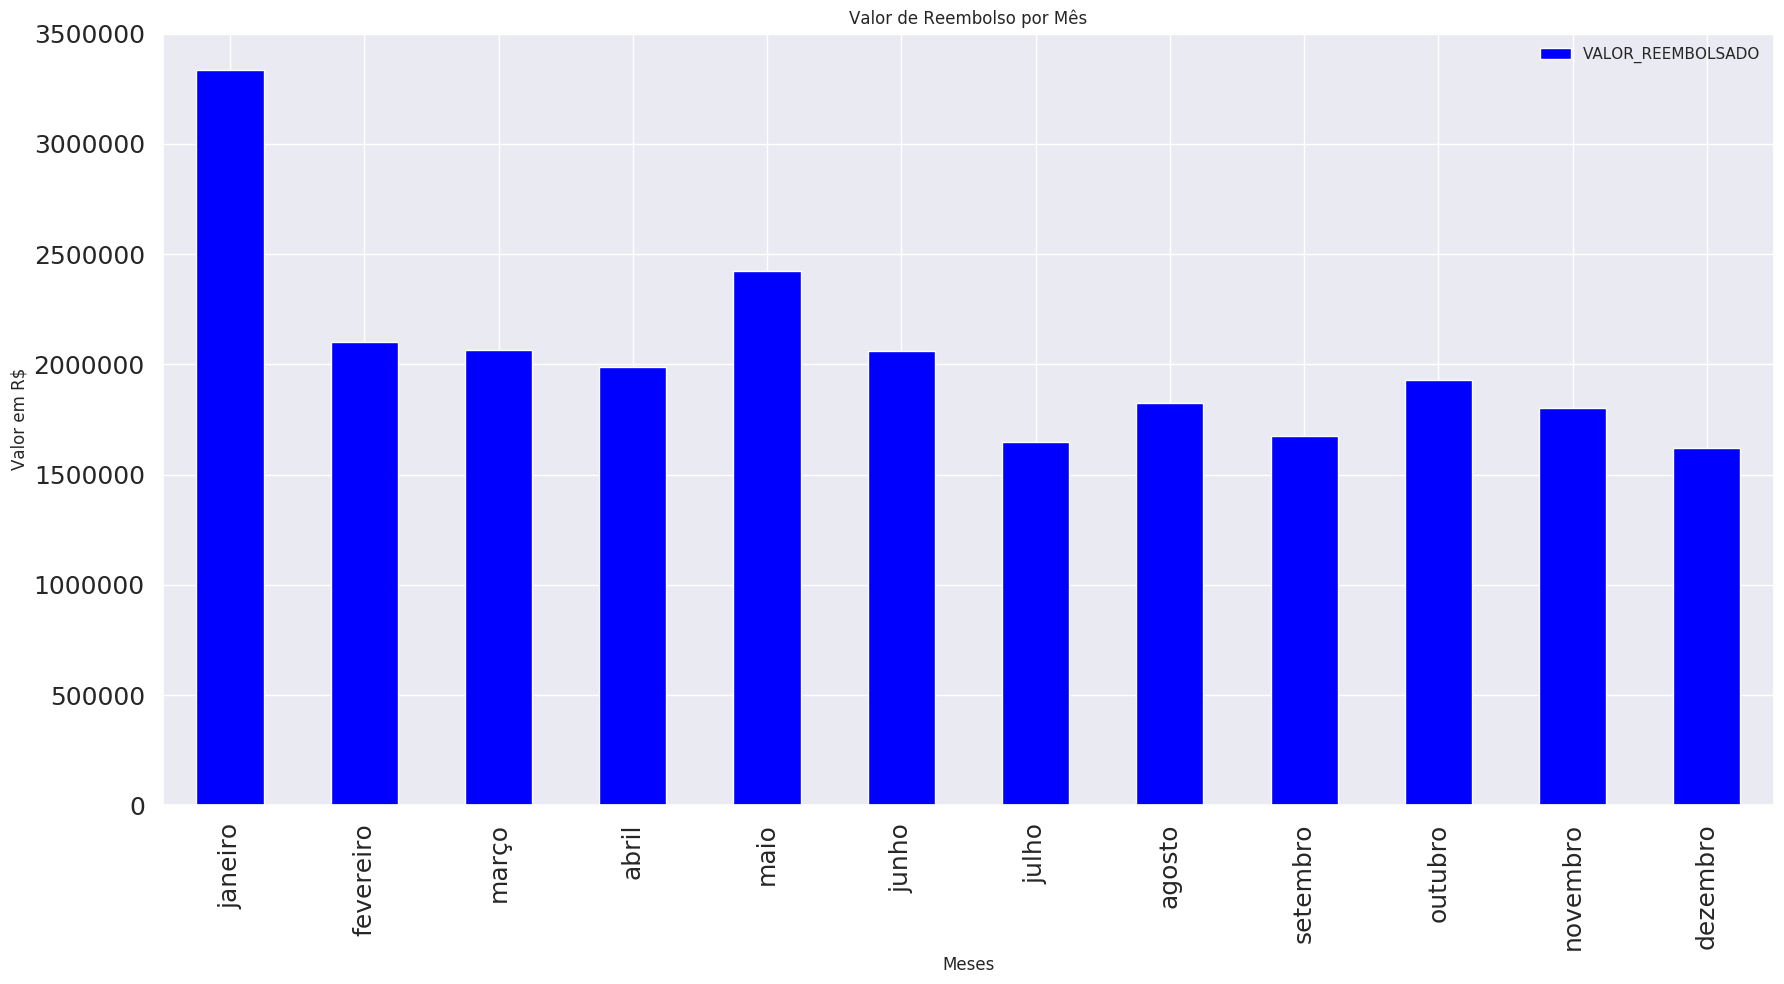

In [69]:
gastos_por_mes.plot(kind='bar', color='blue', fontsize=18)

# visualização do gráfico
plt.ylabel('Valor em R$')
plt.xlabel('Meses')
plt.title("Valor de Reembolso por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.show()

### Verificando a média e mediana dos valores reembolsados

In [70]:
#Selecionando reembolsos feitos apenas em 2016
dados2016 = df[(df['DATA'] >= '2016-01') & (df['DATA'] <= '2016-12')]

#Ultimas linhas do arquivo
dados2016.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
26432,2016,12,93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,083555,2016-12,MISSING,183.4
26433,2016,12,93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,084787,2016-12,MISSING,50.0
26434,2016,12,93,Passagens,09.296.295/0001-60,Azul,QGIJ8X,2016-07,"Companhia Aérea: AZUL, Localizador: QGIJ8X. Pa...",1055.41
26435,2016,12,93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,S6ZB6L,2016-12,"Companhia Aérea: AZUL, Localizador: S6ZB6L. Pa...",390.18
26436,2016,12,93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,ZDS6KY,2016-12,"Companhia Aérea: GOL, Localizador: ZDS6KY. Pas...",654.28


In [71]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = dados2016.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)

# map to view month's name
mapa_de_calor = mapa_de_calor.rename(index={
                      '2016-01':"janeiro",
                      '2016-02':"fevereiro",
                      '2016-03':"março",
                      '2016-04':"abril",
                      '2016-05':"maio",
                      '2016-06':"junho",
                      '2016-07':"julho",
                      '2016-08':"agosto",
                      '2016-09':"setembro",
                      '2016-10':"outubro",
                      '2016-11':"novembro",
                      '2016-12':"dezembro"})

mapa_de_calor.head()

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
DATA,,,,,,,
janeiro,6.81721e+05,5.19205e+05,1.30288e+05,4.19496e+05,8.78388e+05,4.23177e+05,2.84426e+05
fevereiro,3.55622e+05,2.86143e+05,1.03719e+05,2.52819e+05,5.92271e+05,4.87826e+05,21832.4
março,3.61368e+05,2.55113e+05,94986.4,2.91706e+05,4.40847e+05,5.86842e+05,33859.8
abril,3.9279e+05,2.43226e+05,93684.0,2.24045e+05,4.6282e+05,5.49032e+05,21978.2
maio,7.64975e+05,2.7563e+05,80266.8,2.63856e+05,4.76911e+05,5.20547e+05,39481.0


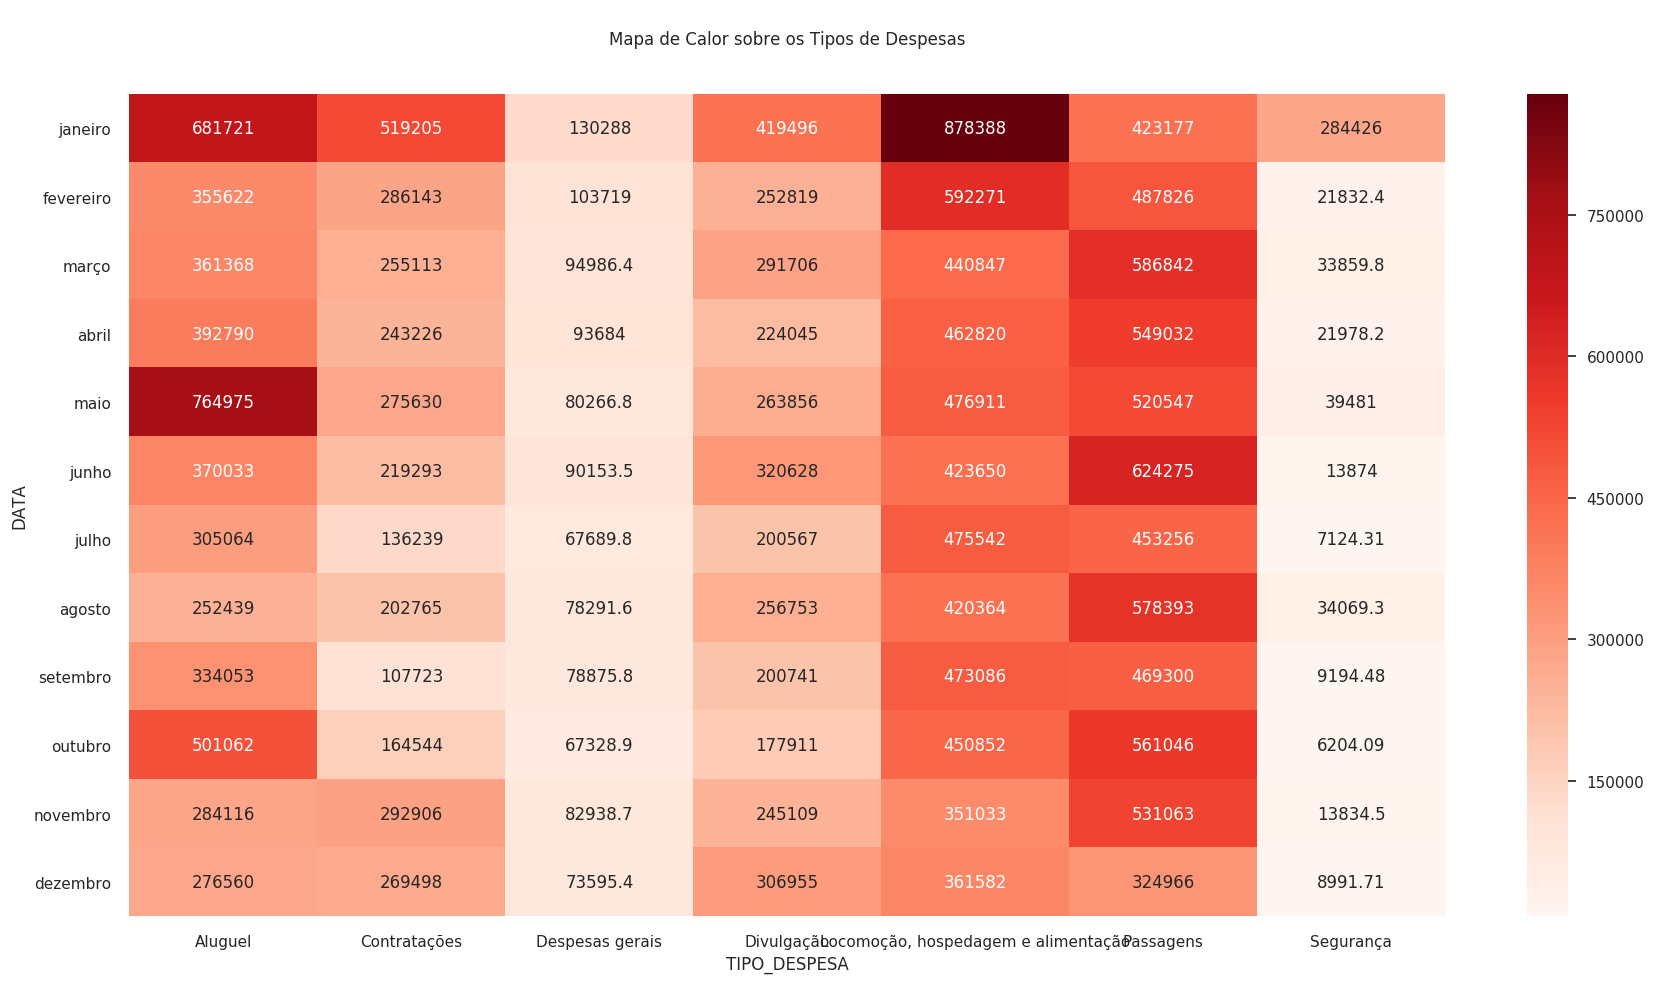

In [72]:
#Gerando o mapa de calor
sns.heatmap(mapa_de_calor, annot=True, fmt='g', cmap='Reds')

plt.title("\nMapa de Calor sobre os Tipos de Despesas\n\n")
plt.show()